# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle
import os
# TODO: Fill this in based on where you saved the training and testing data
main_folder = "./traffic-signs-data"

training_file = os.path.join(main_folder,"train.p")
validation_file= os.path.join(main_folder,"valid.p")
testing_file = os.path.join(main_folder,"test.p")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?

image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

## Load the signames

In [6]:
import csv 
import pandas as pd

In [7]:
dataframe = pd.read_csv('signnames.csv')
label_dict = pd.Series(dataframe.SignName, index=dataframe.ClassId).to_dict()
    

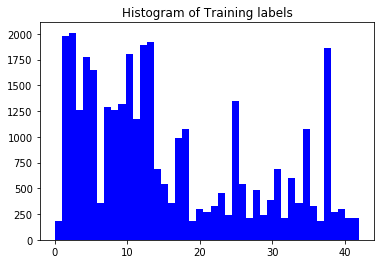

In [8]:
plt.hist(y_train, 43, normed=0, histtype='bar', color ='blue')
plt.title("Histogram of Training labels")
plt.show()

## Observations
The frequecy of the "type" of traffic sign does not have normal distribution. Is this reflected in the probability that a driver would see in the real world, i.e. do the most common traffic signs have higher number of training samples ? 

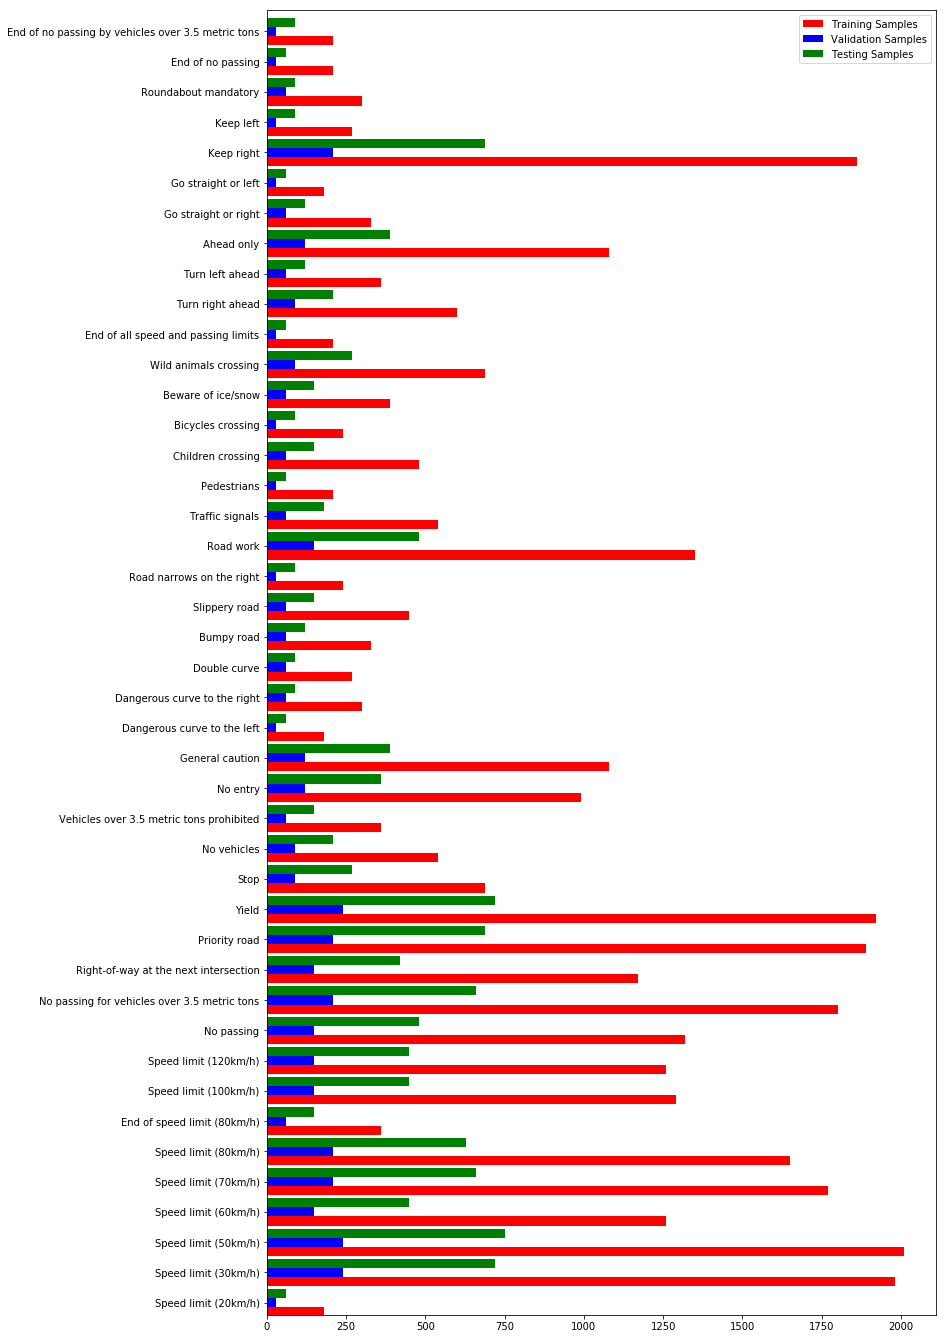

In [9]:
import collections
import numpy as np

label_train_counter = collections.Counter(y_train)
label_valid_counter = collections.Counter(y_valid)
label_test_counter = collections.Counter(y_test)

labels_n, labels_train_count = list(), list()
labels_test_count, labels_valid_count = list(), list()

for i in label_train_counter.keys():
    labels_n.append(label_dict[i])
for j in label_train_counter.values():
    labels_train_count.append(j)
for k in label_valid_counter.values():
    labels_valid_count.append(k)
for z in label_test_counter.values():
    labels_test_count.append(z)

"""
plt.figure(figsize=(15,24))    
plt.barh(range(len(labels_n)),labels_count)
plt.yticks(range(len(labels_n)),labels_n)
"""

ind = np.arange(len(labels_n))
width = 0.3

fig, ax = plt.subplots(figsize=(12,24))
ax.barh(ind, labels_train_count, width, color='red', label='Training Samples')
ax.barh(ind + width, labels_valid_count, width, color='blue', label='Validation Samples')
ax.barh(ind + width + width, labels_test_count,width, color='green', label='Testing Samples')

ax.set(yticks=ind + (width), yticklabels=labels_n, ylim=[3*width - 1, len(labels_n)])
ax.legend()

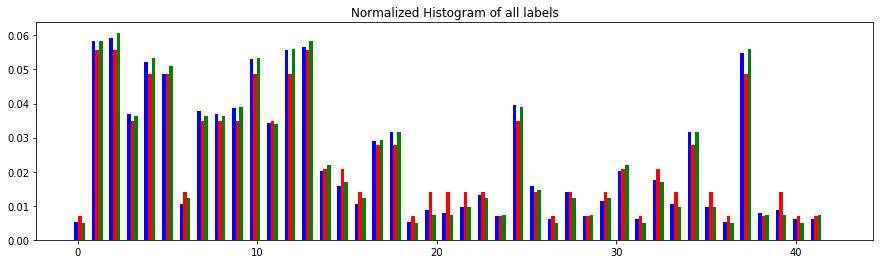

In [10]:
plt.figure(figsize=(15,4))
plt.hist(y_train-0.2,43, width =0.2, normed=1, histtype='bar', color ='blue')
plt.hist(y_valid,43, width =0.2, normed=1, histtype='bar', color ='red')
plt.hist(y_test + 0.2,43, width = 0.2, normed=1, histtype='bar', color ='green')
plt.title("Normalized Histogram of all labels")
plt.show()

## Observations
From the normalized histograms, Even though the training samples do not have a uniform distribution, the testing and validation samples follow suite. 

## Ploting Random Training Images

Let's select a couple of images to plot 

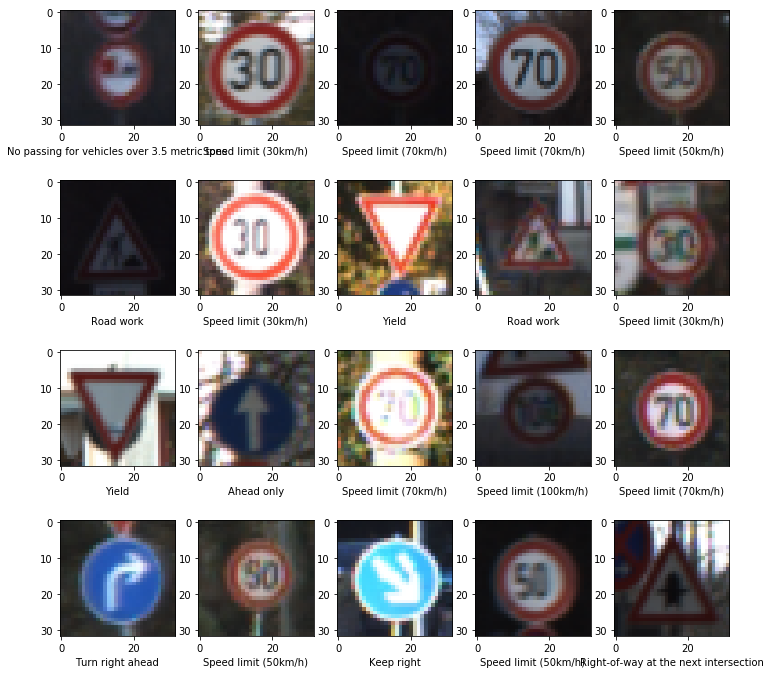

In [11]:
import random

Num_Show = 20
plt.figure(figsize=(12,12))
for x in range(Num_Show):
    rnd_int =random.randint(0,n_train)
    
    plt.subplot(4,5,x+1)
    plt.imshow(X_train[rnd_int])
    plt.xlabel(label_dict[y_train[rnd_int]])
    

## Ploting first 20 Training Images from highest sample count 

Let's select a couple of images from the highest "count" category - Speed limit 50 and show them 


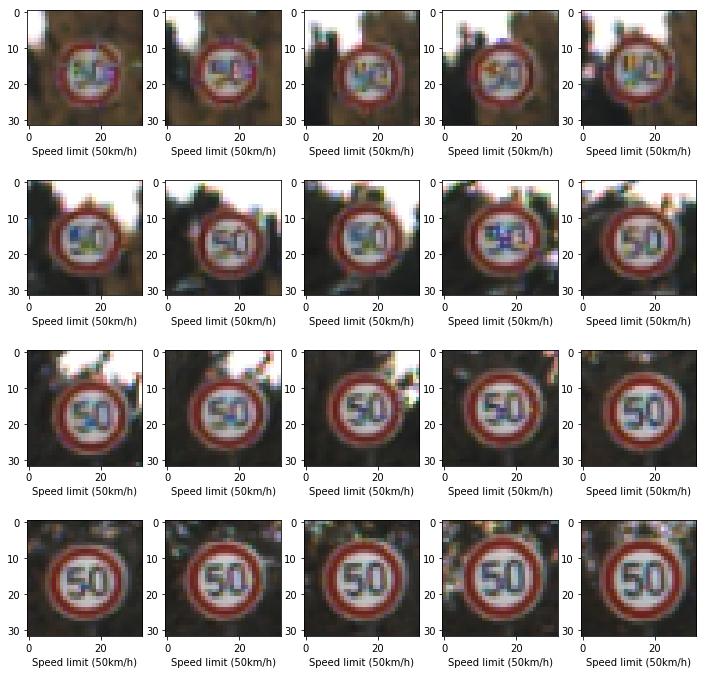

In [12]:
count = 1
plt.figure(figsize=(12,12))
for x in range(len(X_train)):
    if (y_train[x] == 2):
        plt.subplot(4,5, count)
        plt.imshow(X_train[x])
        plt.xlabel(label_dict[y_train[x]])
        count += 1
    if (count > 20):
        break
        
        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## Define LeNet - CNN 

In [109]:
from tensorflow.contrib.layers import flatten
import cv2

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
         
    X_Y_layer0, X_U_layer0 , X_V_layer0 = tf.unstack (x, axis=-1)
    
    X_Y_layer = tf.expand_dims(X_Y_layer0, 3)
    X_U_layer = tf.expand_dims(X_U_layer0, 3)
    X_V_layer = tf.expand_dims(X_V_layer0, 3)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W_Y = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b_Y = tf.Variable(tf.zeros(32))
    conv1_Y   = tf.nn.conv2d(X_Y_layer, conv1_W_Y, strides=[1, 1, 1, 1], padding='VALID') + conv1_b_Y

    conv1_W_U = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b_U = tf.Variable(tf.zeros(6))
    conv1_U   = tf.nn.conv2d(X_U_layer, conv1_W_U, strides=[1, 1, 1, 1], padding='VALID') + conv1_b_U
    
    conv1_W_V = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b_V = tf.Variable(tf.zeros(6))
    conv1_V   = tf.nn.conv2d(X_V_layer, conv1_W_V, strides=[1, 1, 1, 1], padding='VALID') + conv1_b_V
    
    # SOLUTION: Activation.
    conv1_Y = tf.nn.relu(conv1_Y)
    conv1_U = tf.nn.relu(conv1_U)
    conv1_V = tf.nn.relu(conv1_V)
    
    # SOLUTION: Pooling. Input = 28x28x[18 6 6]. Output = 14x14x[18 6 6].
    conv1_Y = tf.nn.max_pool(conv1_Y, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1_U = tf.nn.max_pool(conv1_U, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1_V = tf.nn.max_pool(conv1_V, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W_Y = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 18), mean = mu, stddev = sigma))
    conv2_b_Y = tf.Variable(tf.zeros(18))
    conv2_Y   = tf.nn.conv2d(conv1_Y, conv2_W_Y, strides=[1, 1, 1, 1], padding='VALID') + conv2_b_Y
    
    conv2_W_U = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 2), mean = mu, stddev = sigma))
    conv2_b_U = tf.Variable(tf.zeros(2))
    conv2_U   = tf.nn.conv2d(conv1_U, conv2_W_U, strides=[1, 1, 1, 1], padding='VALID') + conv2_b_U
    
    conv2_W_V = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 2), mean = mu, stddev = sigma))
    conv2_b_V = tf.Variable(tf.zeros(2))
    conv2_V   = tf.nn.conv2d(conv1_V, conv2_W_V, strides=[1, 1, 1, 1], padding='VALID') + conv2_b_V
    
    # SOLUTION: Activation.
    conv2_Y = tf.nn.relu(conv2_Y)
    conv2_U = tf.nn.relu(conv2_U)
    conv2_V = tf.nn.relu(conv2_V)
    
    
    # SOLUTION: Pooling. Input = 10x10x[12 4 4]. Output = 5x5x[18 2 2].
    conv2_Y = tf.nn.max_pool(conv2_Y, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2_U = tf.nn.max_pool(conv2_U, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2_V = tf.nn.max_pool(conv2_V, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x[12 4 4]. Output = 450 50 50
    fc0_Y   = flatten(conv2_Y)
    fc0_U   = flatten(conv2_U)
    fc0_V   = flatten(conv2_V)
    
    fc0 = tf.concat(1,[fc0_Y, fc0_U, fc0_V])
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(550, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 100. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [110]:
import tensorflow as tf


## Define Run Lenet - for multiple runs with Different parameters & image transformations

In [111]:
from sklearn.utils import shuffle

def runLenet(X_train,y_train, X_valid, y_valid,BATCH_SIZE, EPOCHS, rate):
    
    x = tf.placeholder(tf.float32, (None, 32, 32, 3)) 
    y = tf.placeholder(tf.int32, (None))
    
    keep_prob = tf.placeholder(tf.float32)
    one_hot_y = tf.one_hot(y, 43)
    
    logits = LeNet(x,keep_prob)
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()
    
    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
    
    val_plot =np.zeros([EPOCHS,2])
    max_Accuracy = 0.0
    max_acc_epoch = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
    
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.8})
            
            validation_accuracy = evaluate(X_valid, y_valid)
            val_plot[i][:] = i+1 , validation_accuracy
            
            if (validation_accuracy >= max_Accuracy):
                max_Accuracy = validation_accuracy
                max_acc_epoch = i+1
            
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                   
        saver.save(sess, './lenet')
        print("Model saved")
        plt.figure(figsize=(10,6))
        plt.plot(val_plot[:,0],val_plot[:,1],'b+')
        plt.ylabel('Validation Accuracy')
        plt.xlabel('EPOCH #')
        
        print("Max Validation Accuracy = {:.3f} at Epoch # {:.1f}".format(max_Accuracy,max_acc_epoch))
                
    return 
  

## Run Base Case Scenario

Training...

EPOCH 1 ...
Validation Accuracy = 0.781
EPOCH 2 ...
Validation Accuracy = 0.872
EPOCH 3 ...
Validation Accuracy = 0.918
EPOCH 4 ...
Validation Accuracy = 0.926
EPOCH 5 ...
Validation Accuracy = 0.933
EPOCH 6 ...
Validation Accuracy = 0.936
EPOCH 7 ...
Validation Accuracy = 0.929
EPOCH 8 ...
Validation Accuracy = 0.941
EPOCH 9 ...
Validation Accuracy = 0.943
EPOCH 10 ...
Validation Accuracy = 0.932
EPOCH 11 ...
Validation Accuracy = 0.962
EPOCH 12 ...
Validation Accuracy = 0.945
EPOCH 13 ...
Validation Accuracy = 0.955
EPOCH 14 ...
Validation Accuracy = 0.951
EPOCH 15 ...
Validation Accuracy = 0.954
EPOCH 16 ...
Validation Accuracy = 0.959
EPOCH 17 ...
Validation Accuracy = 0.960
EPOCH 18 ...
Validation Accuracy = 0.950
EPOCH 19 ...
Validation Accuracy = 0.956
EPOCH 20 ...
Validation Accuracy = 0.959
EPOCH 21 ...
Validation Accuracy = 0.946
EPOCH 22 ...
Validation Accuracy = 0.957
EPOCH 23 ...
Validation Accuracy = 0.964
EPOCH 24 ...
Validation Accuracy = 0.961
EPOCH 25 ...

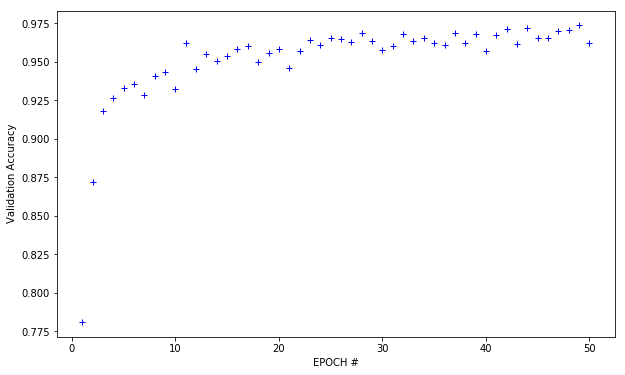

In [112]:
BATCH_SIZE = 128
EPOCHS = 50
rate = 0.001
# additional parameter to change based on image type 3 for RGB, 1 for grascale etc.

X_train_YUV = np.empty((len(X_train),32,32,3))
X_valid_YUV = np.empty((len(X_valid),32,32,3))

for x in range(len(X_train)):
    X_train_YUV[x,:,:,:] = cv2.cvtColor(X_train[x], cv2.COLOR_BGR2YUV)
    
for y in range(len(X_valid)):
    X_valid_YUV[y,:,:,:] = cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2YUV)
    
X_YUV_max =  X_train_YUV.max()
X_YUV_min =  X_train_YUV.min()

X_train_YUV = 0.1 +((X_train_YUV-X_YUV_min)/(X_YUV_max-X_YUV_min))*(.9-.1)
X_valid_YUV = 0.1 +((X_valid_YUV-X_YUV_min)/(X_YUV_max-X_YUV_min))*(.9-.1)

runLenet(X_train_YUV,y_train, X_valid_YUV, y_valid, BATCH_SIZE, EPOCHS, rate )

# Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

## Image processing - 1 - Easy Standardized

Training...

Model saved
Max Validation Accuracy = 0.834 at Epoch # 15.0


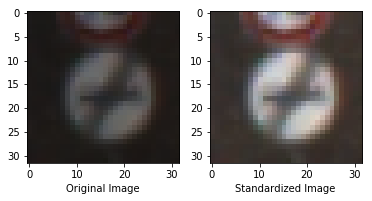

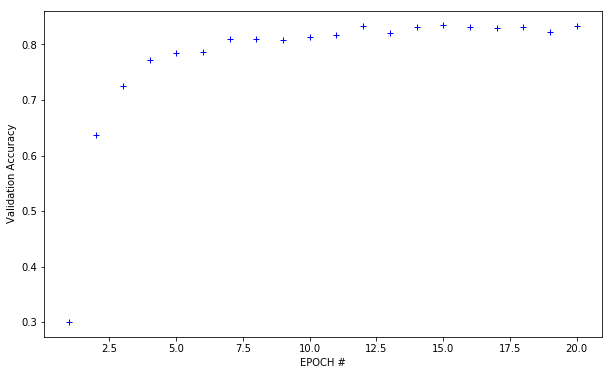

In [195]:
X_train_Std = X_train.copy()
X_valid_Std = X_valid.copy()

X_train_Std = ((X_train_Std - 128)/128)
X_valid_Std = ((X_valid_Std - 128)/128)

plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_Std[0])
plt.xlabel('Standardized Image')

runLenet(X_train_Std,y_train, X_valid_Std, y_valid, BATCH_SIZE, EPOCHS, num_of_layer, rate )

## Image processing - 2 - MaxMinScaler

Training...

Model saved
Max Validation Accuracy = 0.961 at Epoch # 16.0


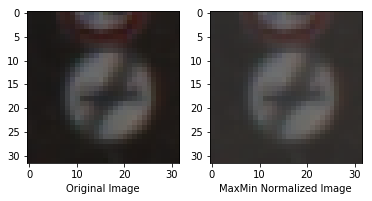

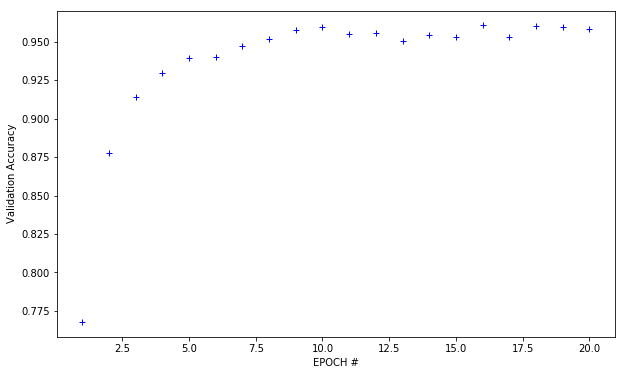

In [196]:
X_train_mm = X_train.copy()
X_valid_mm = X_valid.copy()

X_train_max= X_train_mm.max()
X_train_min= X_train_mm.min()

a=0.1
b=0.9
X_train_mm = a + ((X_train_mm - X_train_min)/(X_train_max-X_train_min))*(b-a)
X_valid_mm = a + ((X_valid_mm - X_train_min)/(X_train_max-X_train_min))*(b-a)

plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_mm[0])
plt.xlabel('MaxMin Normalized Image')

runLenet(X_train_mm,y_train, X_valid_mm, y_valid, BATCH_SIZE, EPOCHS, num_of_layer, rate)

 ## Image processing - 3 - Grayscale

Training...

Model saved
Max Validation Accuracy = 0.916 at Epoch # 19.0


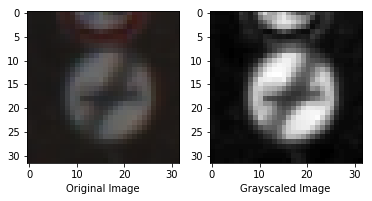

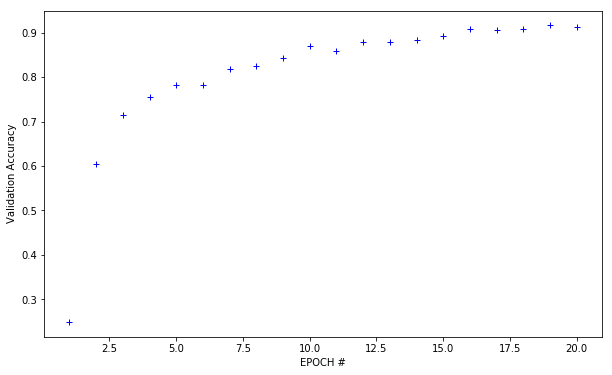

In [197]:
import cv2

X_train_gray = np.empty((len(X_train),32,32,1))
X_valid_gray = np.empty((len(X_valid),32,32,1))
 
for x in range(len(X_train)):
    X_train_gray[x,:,:,0] = cv2.cvtColor(X_train[x], cv2.COLOR_BGR2GRAY)
    #X_train_gray.append(cv2.cvtColor(X_train[x], cv2.COLOR_BGR2GRAY))

for y in range(len(X_valid)):
    X_valid_gray[y,:,:,0] = cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_gray[0,:,:,0], cmap='gray')
plt.xlabel('Grayscaled Image')

runLenet(X_train_gray,y_train, X_valid_gray, y_valid, BATCH_SIZE, EPOCHS, 1, rate)

## Image processing - 4 - YUV - Y only

Training...

Model saved
Max Validation Accuracy = 0.934 at Epoch # 19.0


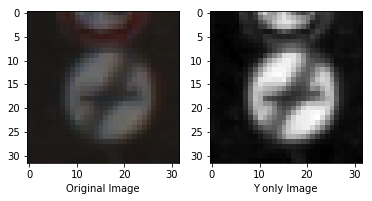

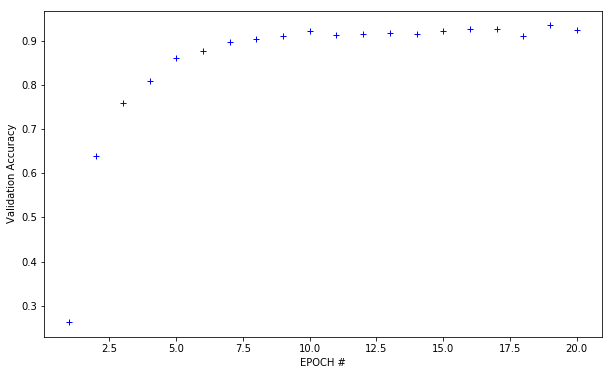

In [198]:
X_train_YUV = np.empty((len(X_train),32,32,1))
X_valid_YUV = np.empty((len(X_valid),32,32,1))

for x in range(len(X_train)):
    X_train_YUV[x,:,:,0] = cv2.cvtColor(X_train[x], cv2.COLOR_BGR2YUV)[:,:,0]
    
for y in range(len(X_valid)):
    X_valid_YUV[y,:,:,0] = cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2YUV)[:,:,0]

    
plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_YUV[0,:,:,0],cmap ='gray')
plt.xlabel('Y only Image')

runLenet(X_train_YUV,y_train, X_valid_YUV, y_valid, BATCH_SIZE, EPOCHS, 1, rate)

## Image processing - 5 - YUV - U only

Training...

Model saved
Max Validation Accuracy = 0.500 at Epoch # 19.0


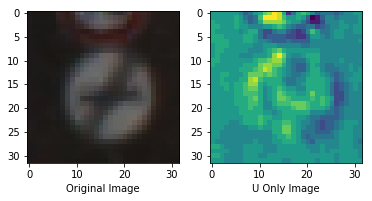

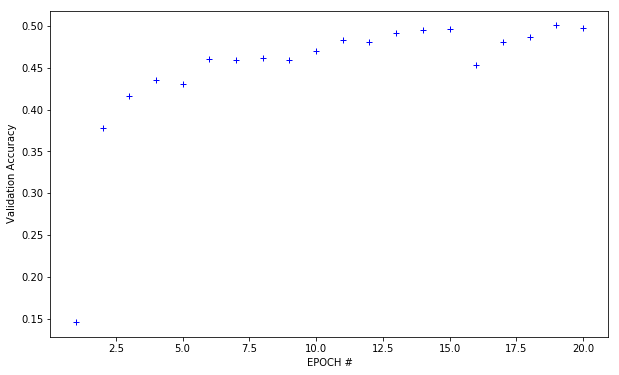

In [199]:
X_train_YUV2 = np.empty((len(X_train),32,32,1))
X_valid_YUV2 = np.empty((len(X_valid),32,32,1))

for x in range(len(X_train)):
    X_train_YUV2[x,:,:,0] = cv2.cvtColor(X_train[x], cv2.COLOR_BGR2YUV)[:,:,1]
    
for y in range(len(X_valid)):
    X_valid_YUV2[y,:,:,0] = cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2YUV)[:,:,1]
    
plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_YUV2[0,:,:,0])
plt.xlabel('U Only Image')

runLenet(X_train_YUV2,y_train, X_valid_YUV2, y_valid, BATCH_SIZE, EPOCHS, 1, rate)

## Image processing - 6 - YUV - V only

Training...

Model saved
Max Validation Accuracy = 0.507 at Epoch # 20.0


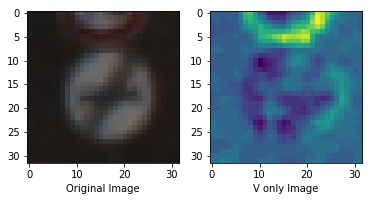

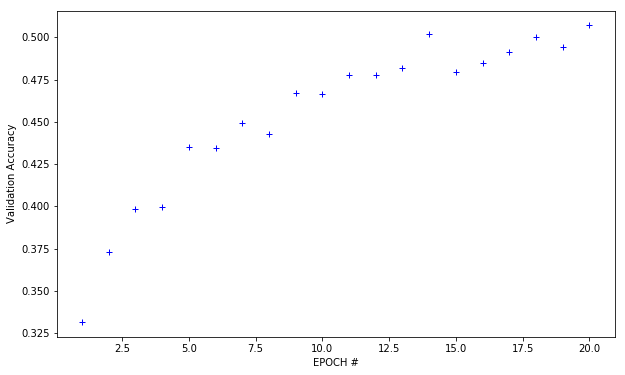

In [200]:
X_train_YUV3 = np.empty((len(X_train),32,32,1))
X_valid_YUV3 = np.empty((len(X_valid),32,32,1))

for x in range(len(X_train)):
    X_train_YUV3[x,:,:,0] = cv2.cvtColor(X_train[x], cv2.COLOR_BGR2YUV)[:,:,2]
    
for y in range(len(X_valid)):
    X_valid_YUV3[y,:,:,0] = cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2YUV)[:,:,2]

plt.subplot(1,2,1)
plt.imshow(X_train[0])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_YUV3[0,:,:,0])
plt.xlabel('V only Image')

runLenet(X_train_YUV3,y_train, X_valid_YUV3, y_valid, BATCH_SIZE, EPOCHS, 1, rate)

## Image processing - 7 - YUV 

Training...

Model saved
Max Validation Accuracy = 0.869 at Epoch # 20.0


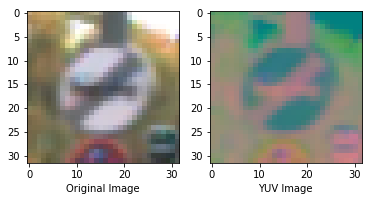

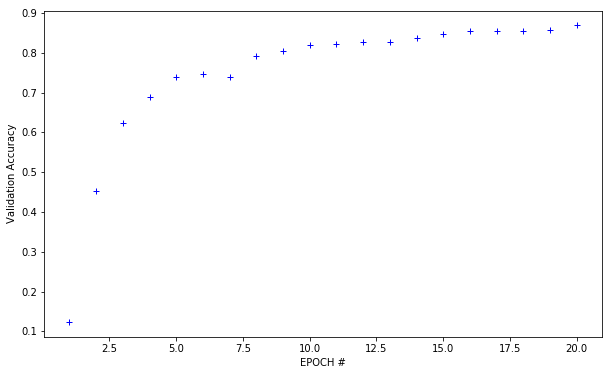

In [201]:
X_train_YUV4 = np.empty((len(X_train),32,32,3))
X_valid_YUV4 = np.empty((len(X_valid),32,32,3))

for x in range(len(X_train)):
    X_train_YUV4[x,:,:,:] = cv2.cvtColor(X_train[x], cv2.COLOR_BGR2YUV)
    
for y in range(len(X_valid)):
    X_valid_YUV4[y,:,:,:] = cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2YUV)

plt.subplot(1,2,1)
plt.imshow(X_train[100])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_YUV4[100])
plt.xlabel('YUV Image')

runLenet(X_train_YUV4,y_train, X_valid_YUV4, y_valid, BATCH_SIZE, EPOCHS, 3, rate)

## Image processing - 8 - YUV & MinMax Scaler

Training...

Model saved
Max Validation Accuracy = 0.956 at Epoch # 18.0


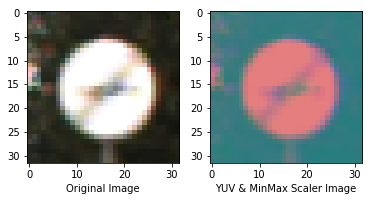

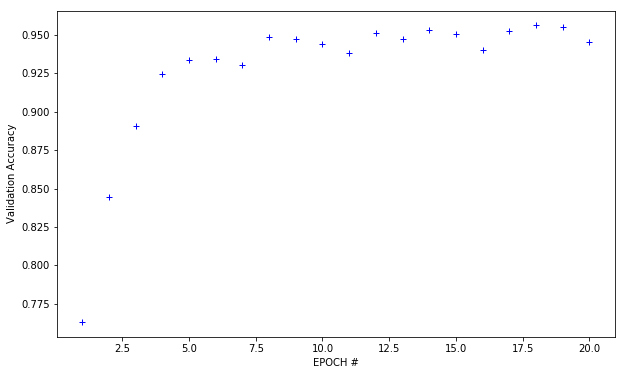

In [20]:
import cv2

X_train_YUV6 = np.empty((len(X_train),32,32,3))
X_valid_YUV6 = np.empty((len(X_valid),32,32,3))

for x in range(len(X_train)):
    X_train_YUV6[x,:,:,:] = cv2.cvtColor(X_train[x], cv2.COLOR_BGR2YUV)[:,:,:]
    
for y in range(len(X_valid)):
    X_valid_YUV6[y,:,:,:] = cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2YUV)[:,:,:]

X_train_YUV6_max = X_train_YUV6.max()
X_train_YUV6_min = X_train_YUV6.min()

a=0.1
b=0.9

X_train_YUV6 = a + ((X_train_YUV6 - X_train_YUV6_min)/(X_train_YUV6_max-X_train_YUV6_min))*(b-a)
X_valid_YUV6 = a + ((X_valid_YUV6 - X_train_YUV6_min)/(X_train_YUV6_max-X_train_YUV6_min))*(b-a)

    
plt.subplot(1,2,1)
plt.imshow(X_train[150])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_YUV6[150,:,:,:])
plt.xlabel('YUV & MinMax Scaler Image')

runLenet(X_train_YUV6,y_train, X_valid_YUV6, y_valid, 128, 20, 3, 0.001)

## Image processing - 9 - YUV - Y only & MinMax Scaler

Training...

Model saved
Max Validation Accuracy = 0.968 at Epoch # 18.0


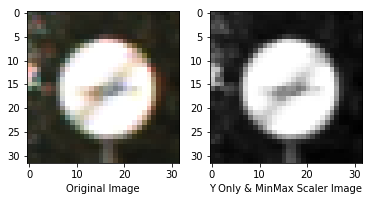

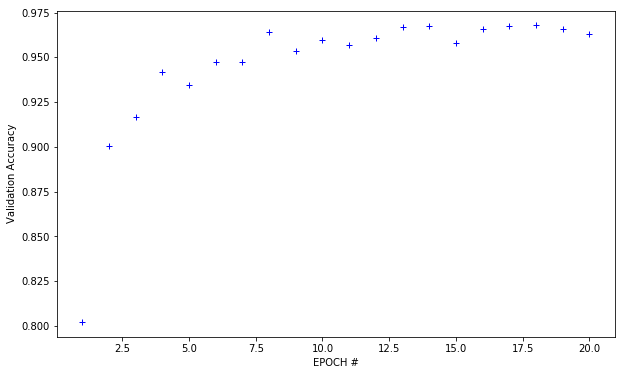

In [202]:
X_train_YUV5 = np.empty((len(X_train),32,32,1))
X_valid_YUV5 = np.empty((len(X_valid),32,32,1))

for x in range(len(X_train)):
    X_train_YUV5[x,:,:,0] = cv2.cvtColor(X_train[x], cv2.COLOR_BGR2YUV)[:,:,0]
    
for y in range(len(X_valid)):
    X_valid_YUV5[y,:,:,0] = cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2YUV)[:,:,0]

X_train_YUV5_max = X_train_YUV5.max()
X_train_YUV5_min = X_train_YUV5.min()

X_train_YUV5 = a + ((X_train_YUV5 - X_train_YUV5_min)/(X_train_YUV5_max-X_train_YUV5_min))*(b-a)
X_valid_YUV5 = a + ((X_valid_YUV5 - X_train_YUV5_min)/(X_train_YUV5_max-X_train_YUV5_min))*(b-a)

    
plt.subplot(1,2,1)
plt.imshow(X_train[150])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_YUV5[150,:,:,0],cmap ='gray')
plt.xlabel('Y Only & MinMax Scaler Image')

runLenet(X_train_YUV5,y_train, X_valid_YUV5, y_valid, BATCH_SIZE, EPOCHS, 1, rate)

## Image processing - 10 - Grayscale & MinMaxScaler

Training...

Model saved
Max Validation Accuracy = 0.952 at Epoch # 17.0


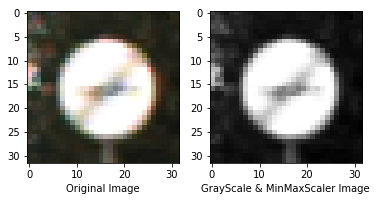

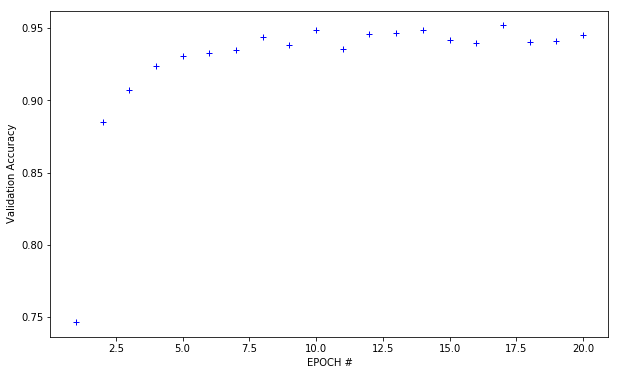

In [203]:
X_train_gray1 = np.empty((len(X_train),32,32,1))
X_valid_gray1 = np.empty((len(X_valid),32,32,1))

for x in range(len(X_train)):
    X_train_gray1[x,:,:,0] = cv2.cvtColor(X_train[x], cv2.COLOR_BGR2GRAY)
    
for y in range(len(X_valid)):
    X_valid_gray1[y,:,:,0] = cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2GRAY)

X_train_gray1_max = X_train_gray1.max()
X_train_gray1_min = X_train_gray1.min()

X_train_gray1 = a + ((X_train_gray1 - X_train_gray1_min)/(X_train_gray1_max-X_train_gray1_min))*(b-a)
X_valid_gray1 = a + ((X_valid_gray1 - X_train_gray1_min)/(X_train_gray1_max-X_train_gray1_min))*(b-a)

plt.subplot(1,2,1)
plt.imshow(X_train[150])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_gray1[150,:,:,0],cmap ='gray')
plt.xlabel('GrayScale & MinMaxScaler Image')

runLenet(X_train_gray1,y_train, X_valid_gray1, y_valid, BATCH_SIZE, EPOCHS, 1, rate)

## Image processing - 11 -  Grayscale & Laplacian Edge Detection Filter 

Training...

Model saved
Max Validation Accuracy = 0.952 at Epoch # 20.0


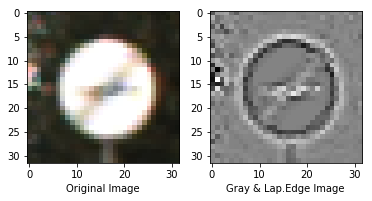

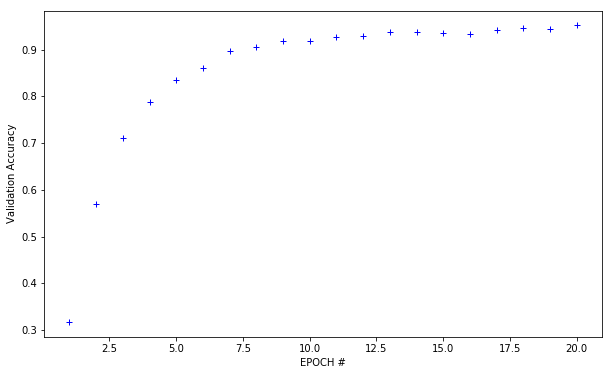

In [208]:
X_train_gray2 = np.empty((len(X_train),32,32,1))
X_valid_gray2 = np.empty((len(X_valid),32,32,1))

for x in range(len(X_train)):
    X_train_gray2[x,:,:,0] = cv2.Laplacian(cv2.cvtColor(X_train[x], cv2.COLOR_BGR2GRAY),cv2.CV_64F)
    
for y in range(len(X_valid)):
    X_valid_gray2[y,:,:,0] = cv2.Laplacian(cv2.cvtColor(X_valid[y], cv2.COLOR_BGR2GRAY),cv2.CV_64F)


plt.subplot(1,2,1)
plt.imshow(X_train[150])
plt.xlabel('Original Image')

plt.subplot(1,2,2)
plt.imshow(X_train_gray2[150,:,:,0],cmap ='gray')
plt.xlabel('Gray & Lap.Edge Image')

runLenet(X_train_gray2,y_train, X_valid_gray2, y_valid, BATCH_SIZE, EPOCHS, 1, rate)


# Trial Run of Architecture 

Running a full train, validate, and test run with RGB images and min-max scaler. See Project writeup for motivation and details. 



In [209]:
X_train_mm = X_train.copy()
X_valid_mm = X_valid.copy()

X_train_max= X_train_mm.max()
X_train_min= X_train_mm.min()

a=0.1
b=0.9

X_train_mm = a + ((X_train_mm - X_train_min)/(X_train_max-X_train_min))*(b-a)
X_valid_mm = a + ((X_valid_mm - X_train_min)/(X_train_max-X_train_min))*(b-a)


x = tf.placeholder(tf.float32, (None, 32, 32, num_of_layer))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)
    
rate = 0.001

logits = LeNet(x,3,keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
    
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
    
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
   
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_mm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_mm, y_train = shuffle(X_train_mm , y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_mm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.8})
            
        validation_accuracy = evaluate(X_valid_mm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                   
    saver.save(sess, './lenet1')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.829
EPOCH 2 ...
Validation Accuracy = 0.907
EPOCH 3 ...
Validation Accuracy = 0.924
EPOCH 4 ...
Validation Accuracy = 0.925
EPOCH 5 ...
Validation Accuracy = 0.937
EPOCH 6 ...
Validation Accuracy = 0.947
EPOCH 7 ...
Validation Accuracy = 0.946
EPOCH 8 ...
Validation Accuracy = 0.947
EPOCH 9 ...
Validation Accuracy = 0.954
EPOCH 10 ...
Validation Accuracy = 0.934
EPOCH 11 ...
Validation Accuracy = 0.956
EPOCH 12 ...
Validation Accuracy = 0.950
EPOCH 13 ...
Validation Accuracy = 0.955
EPOCH 14 ...
Validation Accuracy = 0.939
EPOCH 15 ...
Validation Accuracy = 0.951
EPOCH 16 ...
Validation Accuracy = 0.951
EPOCH 17 ...
Validation Accuracy = 0.948
EPOCH 18 ...
Validation Accuracy = 0.951
EPOCH 19 ...
Validation Accuracy = 0.956
EPOCH 20 ...
Validation Accuracy = 0.955
Model saved


In [210]:
X_test_mm = X_test.copy()
X_test_mm = a + ((X_test_mm - X_train_min)/(X_train_max-X_train_min))*(b-a)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_mm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.936


## Add Jittered Data -  Translation, Rotation, Skew, & Combined

Number of Total training examples = 173995
Training...

Model saved
Max Validation Accuracy = 0.973 at Epoch # 13.0


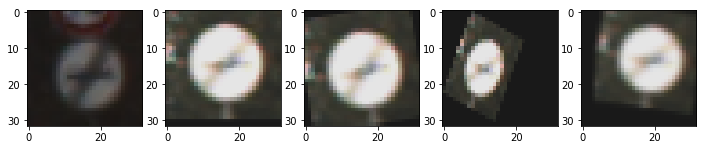

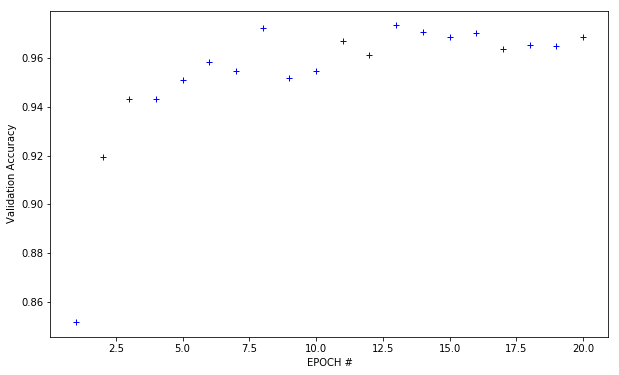

In [213]:
X_Jitter_train_new = X_train.copy()
X_Rotate_train_new = X_train.copy()
X_Skew_train_new = X_train.copy()
X_Com_train_new = X_train.copy()

Delta_J = 4
Delta_R = 15
Delta_S = 10

size, i, j, k = np.shape(X_Jitter_train_new)

for z in range(len(X_Jitter_train_new)):
    Del_x = np.random.uniform(-Delta_J, Delta_J)
    Del_y = np.random.uniform(-Delta_J, Delta_J)
    trans = np.float32([[1,0,Del_x],[0,1,Del_y]])
    X_Jitter_train_new[z,:,:,:] = cv2.warpAffine(X_train[z], trans, (i,j))

for w in range(len(X_Rotate_train_new)):
    Del_R = np.random.uniform(-Delta_R, Delta_R)
    M = cv2.getRotationMatrix2D((i/2,i/2),Del_R,1)
    X_Rotate_train_new[w,:,:,:] = cv2.warpAffine(X_train[w],M,(i,j))
    
#Skew transformation adapted from - https://github.com/vxy10/ImageAugmentation/blob/master/img_transform_NB.ipynb
pts1 = np.float32([[5,5],[20,5],[5,20]])

for u in range(len(X_Skew_train_new)):
    pt1 = 5+Delta_S*np.random.uniform()-Delta_S/2
    pt2 = 20+Delta_S*np.random.uniform()-Delta_S/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    Del_S = cv2.getAffineTransform(pts1,pts2)
    X_Skew_train_new[u,:,:,:] = cv2.warpAffine(X_train[u],Del_S,(i,j))

for v in range(len(X_Com_train_new)):
    Del_x = np.random.uniform(-Delta_J, Delta_J)
    Del_y = np.random.uniform(-Delta_J, Delta_J)
    trans = np.float32([[1,0,Del_x],[0,1,Del_y]])
    
    Del_R = np.random.uniform(-Delta_R, Delta_R)
    M = cv2.getRotationMatrix2D((i/2,i/2),Del_R,1)
    
    pt1 = 5+Delta_S*np.random.uniform()-Delta_S/2
    pt2 = 20+Delta_S*np.random.uniform()-Delta_S/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    Del_S = cv2.getAffineTransform(pts1,pts2)
    
    X_Com_train_new[v,:,:,:] = cv2.warpAffine(X_train[v],Del_S,(i,j))
    X_Com_train_new[v,:,:,:] = cv2.warpAffine(X_Com_train_new[v,:,:,:],M,(i,j))
    X_Com_train_new[v,:,:,:] = cv2.warpAffine(X_Com_train_new[v,:,:,:],trans, (i,j))
    

X_ALL_train = np.concatenate((X_train, X_Jitter_train_new,X_Rotate_train_new,X_Skew_train_new,X_Com_train_new))
y_ALL_train = np.concatenate((y_train, y_train,y_train,y_train, y_train))

X_ALL_valid = X_valid.copy()
X_ALL_train_max= X_ALL_train.max()
X_ALL_train_min= X_ALL_train.min()

X_ALL_train = a + ((X_ALL_train - X_ALL_train_min)/(X_ALL_train_max-X_ALL_train_min))*(b-a)
X_ALL_valid = a + ((X_ALL_valid - X_ALL_train_min)/(X_ALL_train_max-X_ALL_train_min))*(b-a)

print("Number of Total training examples =", len(X_ALL_train))

plt.figure(figsize=(12,20))

plt.subplot(1,5,1)
plt.imshow(X_train[0])

plt.subplot(1,5,2)
plt.imshow(X_ALL_train[(len(X_train)+150)])

plt.subplot(1,5,3)
plt.imshow(X_ALL_train[((len(X_train)*2)+150)])

plt.subplot(1,5,4)
plt.imshow(X_ALL_train[((len(X_train)*3)+150)])

plt.subplot(1,5,5)
plt.imshow(X_ALL_train[((len(X_train)*4)+150)])

runLenet(X_ALL_train,y_ALL_train, X_ALL_valid, y_valid, BATCH_SIZE, EPOCHS, num_of_layer, rate)
#Achieved 97.4% accuracy with trans,rotation & skew

### Model Architecture

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

Model saved


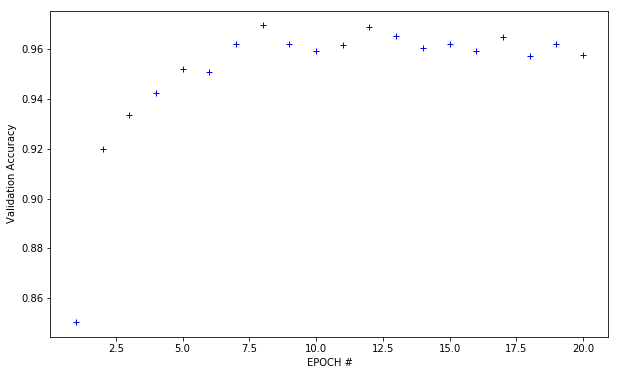

In [215]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

x = tf.placeholder(tf.float32, (None, 32, 32, num_of_layer))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)
    
rate = 0.001

logits = LeNet(x,3,keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
    
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
    
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

val_plot =np.zeros([EPOCHS,2])  
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_ALL_train)
    
    print("Training...")
    print()
    max_Accuracy =0
    for i in range(EPOCHS):
        X_ALL_train, y_ALL_train = shuffle(X_ALL_train , y_ALL_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_ALL_train[offset:end], y_ALL_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.8})
        validation_accuracy = evaluate(X_ALL_valid, y_valid)
        val_plot[i][:] = i+1 , validation_accuracy
            
        if (validation_accuracy >= max_Accuracy):
            max_Accuracy = validation_accuracy
            max_acc_epoch = i+1
            
        #print("EPOCH {} ...".format(i+1))
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                  
    saver.save(sess, './Final')
    print("Model saved")
    
    plt.figure(figsize=(10,6))
    plt.plot(val_plot[:,0],val_plot[:,1],'b+')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('EPOCH #')

In [216]:
X_ALL_test = X_test.copy()

X_ALL_test = a + ((X_ALL_test - X_ALL_train_min)/(X_ALL_train_max-X_ALL_train_min))*(b-a)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_ALL_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.951


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

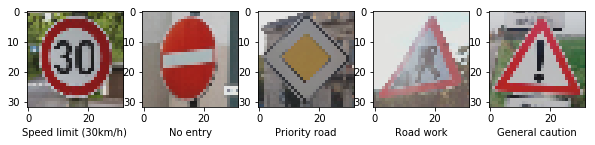

In [229]:
### Load the images and plot them here.

test_folder = './test-images'
X_test_random = np.empty((5,32,32,3))
y_test_random =np.array((1,17,12,25,18))
plt.figure(figsize =(10,20))
for i in range(5):
    image_file = os.path.join(test_folder,"Image_"+str(i+1)+".jpg")
    X_test_random[i,:,:,:] = cv2.cvtColor(cv2.resize(cv2.imread(image_file),(32, 32), interpolation = cv2.INTER_LINEAR ),cv2.COLOR_BGR2RGB)
    X_test_random[i,:,:,:]= a + (X_test_random[i,:,:,:]/255)*(b-a)                                 
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_random[i,:,:,:])
    plt.xlabel(label_dict[y_test_random[i]])
    

### Predict the Sign Type for Each Image

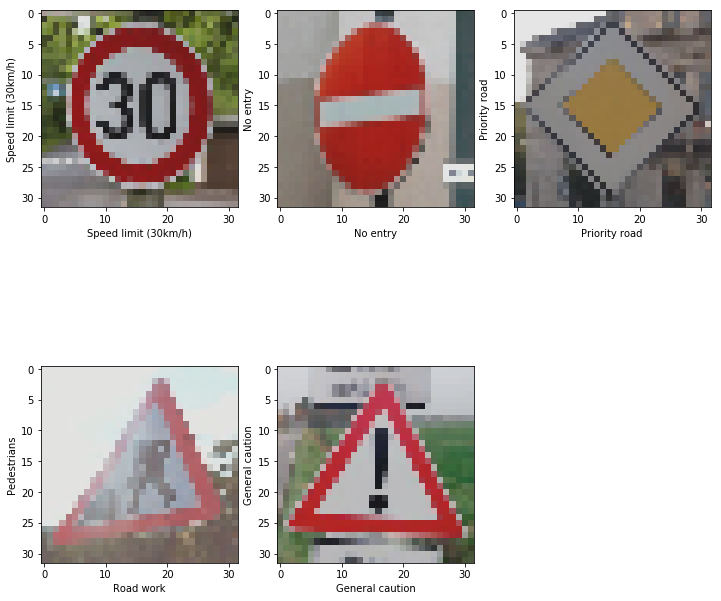

In [230]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    Predictions = np.zeros(len(X_test_random[0]))
    
    Predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: X_test_random, keep_prob: 1.0})
    plt.figure(figsize=(12,12))
    for i in range(5):
        plt.subplot(2,3,i+1)
        plt.imshow(X_test_random[i,:,:,:])
        plt.xlabel(label_dict[y_test_random[i]])
        plt.ylabel(label_dict[Predictions[i]])
        

### Analyze Performance

In [231]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 ou of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_random, y_test_random)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.800


### Load and Output Images - Fun Version

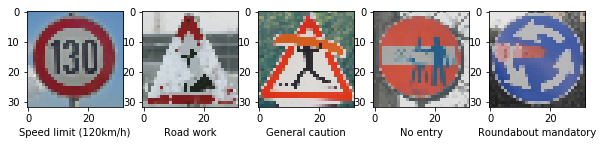

In [232]:
### Load the images and plot them here.

test_folder = './test-images-fun'
X_test_random_fun = np.empty((5,32,32,3))
y_test_random_fun =np.array((8,25,18,17,40))
plt.figure(figsize =(10,20))
for i in range(5):
    image_file = os.path.join(test_folder,"Image_"+str(i+1)+".jpg")
    X_test_random_fun[i,:,:,:] = cv2.cvtColor(cv2.resize(cv2.imread(image_file),(32, 32), interpolation = cv2.INTER_LINEAR ),cv2.COLOR_BGR2RGB)
    X_test_random_fun[i,:,:,:]= a + (X_test_random_fun[i,:,:,:]/255)*(b-a)                                 
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_random_fun[i,:,:,:])
    plt.xlabel(label_dict[y_test_random_fun[i]])

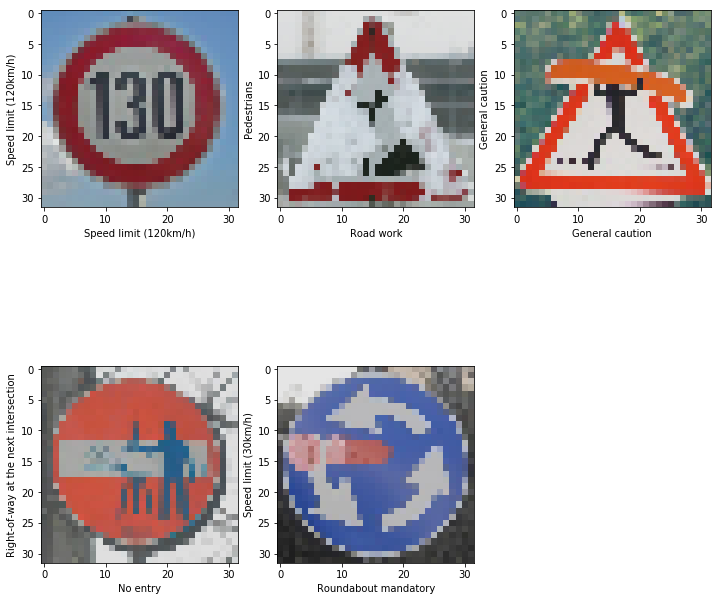

In [235]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    Predictions = np.zeros(len(X_test_random[0]))
    
    Predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: X_test_random_fun, keep_prob: 1.0})
    plt.figure(figsize=(12,12))
    for i in range(5):
        plt.subplot(2,3,i+1)
        plt.imshow(X_test_random_fun[i,:,:,:])
        plt.xlabel(label_dict[y_test_random_fun[i]])
        plt.ylabel(label_dict[Predictions[i]])

In [236]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 ou of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_random_fun, y_test_random_fun)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.400


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [241]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    Predictions = np.zeros(len(X_test_random[0]))
    
    Predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5), feed_dict={x: X_test_random, keep_prob: 1.0})
    
    print(Predictions)

TopKV2(values=array([[  9.94867802e-01,   5.13220439e-03,   3.37337670e-19,
          8.28158689e-20,   2.88763441e-21],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  9.99961972e-01,   3.09594143e-05,   5.82786333e-06,
          7.54135783e-07,   4.49876808e-07],
       [  9.26792383e-01,   7.32076839e-02,   1.04642412e-19,
          1.63581380e-20,   1.63656848e-28]], dtype=float32), indices=array([[ 1,  0, 16,  4,  9],
       [17,  0,  1,  2,  3],
       [12,  0,  1,  2,  3],
       [27, 18, 11, 24, 25],
       [18, 27, 26, 11, 25]]))


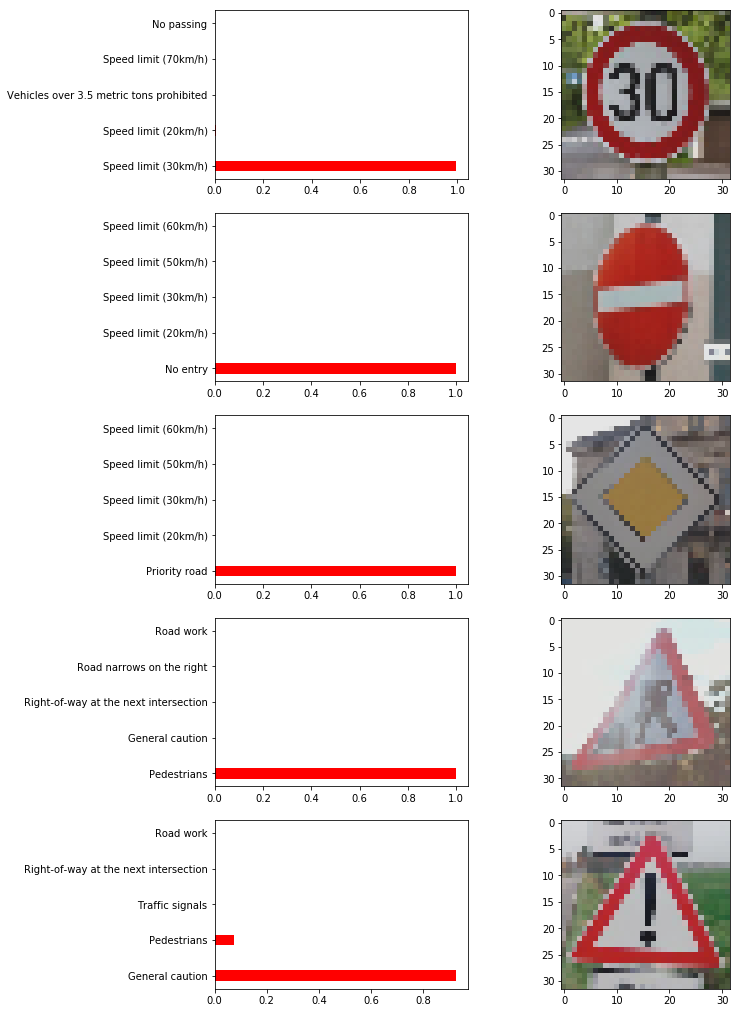

In [303]:
#print((Predictions[0][0][0]))
#print(label_dict[Predictions[1][0][0]])
    
ind = np.arange(5)
width = 0.3
plt.figure(figsize=(10,18))
for i in range(5):
    yticklabel=[]
    for j in range(5):
        yticklabel.append(label_dict[Predictions[1][i][j]])
    plt.subplot(5,2,2*i+1)
    plt.barh(ind, Predictions[0][i][:], width, color='red', label='Training Samples',tick_label =yticklabel)
    
    
    plt.subplot(5,2,(2*i)+2)
    plt.imshow(X_test_random[i,:,:,:])


In [304]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    Predictions = np.zeros(len(X_test_random_fun[0]))
    
    Predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5), feed_dict={x: X_test_random_fun, keep_prob: 1.0})
    

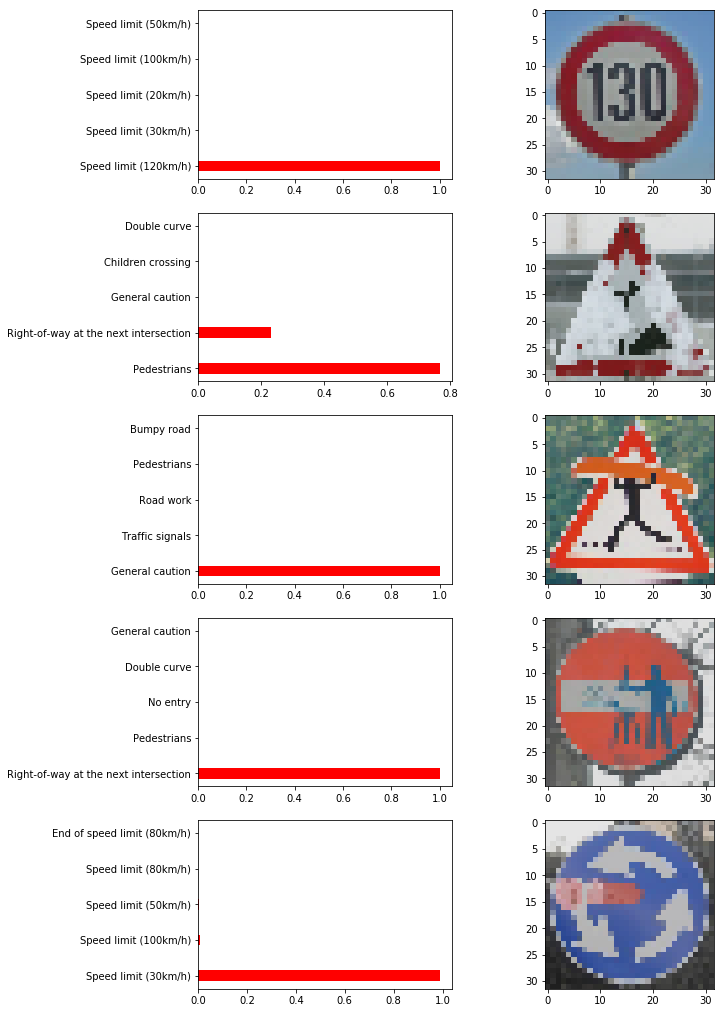

In [306]:
ind = np.arange(5)
width = 0.3
plt.figure(figsize=(10,18))
for i in range(5):
    yticklabel=[]
    for j in range(5):
        yticklabel.append(label_dict[Predictions[1][i][j]])
    plt.subplot(5,2,2*i+1)
    plt.barh(ind, Predictions[0][i][:], width, color='red', label='Training Samples',tick_label =yticklabel)
    
    
    plt.subplot(5,2,(2*i)+2)
    plt.imshow(X_test_random_fun[i,:,:,:])

# Project Writeup 


## Stage 1 - Dataset Exploration

### 1. Provide a basic summary:
The image data has 3 channels (RGB) and is 32 x 32 pixels. 
There are:
- 34799 initial training images
- 4410 validation images
- 12360 testing images
- 43 Classifications

### 2. Dataset  Observations
From a histogram of data by frequency of class (out of 43), it can be seen that the training data does not have a uniform distribution. The training for some classes is 10 X more the lower classes, such keep right, speed limit 50 & 30 km/h. Is the training data skewed to match real world conditions, i.e. if I was driving down a street (do i have a greater chance to see Speed limit 30 km/h). Is that a good data set to use for training ? If this distribution follows "real world" conditions, should a training dataset, show bias or favour to a particular traffic sign? or should it be uniform ? 

However, from the breakdown the validation and testing classes follow approximately the same distribution. This will prevent dataset's class distribution having negative effects on the accuracy on the training. 

In [25]:
## Stage 2 - Desigining and Testing our CNN Architecture

### 2.1 Model Architecture

After playing with a variety of architectures of the Lenet-5 frame. I settled on the following Structure.

1. Convolution Layer 
    - 32 Filters (5X5)
    - Stride: 1
    - Padding: Valid

2. Activation - relu

3. Max pooling
    - Filter (2x2)
    - Strides (2x2)

4. Convolution Layer 
    - 32 Filters (5X5)
    - Stride: 1
    - Padding: Valid

5. Activation - relu

6. Max pooling
    - Filter (2x2)
    - Strides (2x2)

7. Flatten to 800



8. Fully Connected layer 
    - Inputs: 800
    - Outputs: 200

9. Activation - relu

10. Dropout (.8 for training)

11. Fully Connected layer 
    - Inputs: 200
    - Outputs: 100

12. Activation - relu

13. Dropout (.8 for training)

14. Fully Connected layer 
    - Inputs: 100
    - Outputs: 43 (final clases)

### Summary of Architecture Modifications from one presented in class

(1)After trial running multiplier image processing techniques, I started increasing the Number of filter from 6 to [12,24,32] to achieve higher that 93% accuracy for a majority of image preprocessing techniques.
(2-3) Followed the Form presented in class.
(4) Increasing the number of filters to match layer 1 increased accuracy. 
(5-9) Followed the Form presented in class but altered number of inputs to match filters and downsized inputs by 4.
(10) Added Dropout as a measure to prevent overfitting.
(11-12) Followed the Form presented in class but altered number of inputs to match filters and downzised inputs by 2.
(13) Added Dropout as a measure to prevent overfitting.
(14) Followed the Form presented in class but altered number of inputs to match filters and downzised inputs by ~ 2.

### Stage 2.2 Image Pre-Processing & Trial Runs 

#### Trial # 0
Initially I have tried running the Lenet framework with different Epoch numbers, batch sizes, and learning rates. Essentially I used values + or - the values presented in classes, but found no gain. So I Fixed the batch size at 128 & learning rate at .0001. Trial runs for 1st runs had 10 Epochs, and final runs had 20. 

#### Trial # 1 - Base Case Scenario

The base case was RGB color, with no image pre-processing. 

Max Validation Accuracy was 90.9%


#### Trial # 2 -  "Easy" Standardized

Using the following Formula I applied "easy" standardizing.

\begin{align}
\mathbf{x_{pixel}} & =\frac{\mathbf{X_{pixel}} - 128}{128}
\end{align}

Max Validation Accuracy was 83.4%

#### Trial # 3 - MinMax Scaler 

Using the MinMax scaler formula presented in class (shown below) i normalized the pixel data before running it through the CNN.

\begin{align}
\mathbf{x_{pixel}} & = a +\times{\frac{\mathbf{X_{pixel}} - X_{min}}{X_{max} -X_{min}}}{(b-a)}
\end{align}

where: a =0.1; B = 0.9

Max Validation Accuracy was 96.1%

#### Trial # 4 - Grayscale

Using the OpenCV library I simplified the data into 1 channel (i.e. grayscale). 

Max Validation Accuracy = 0.916

However in the past when my CNN had fewer number of filters (6), the grayscale outperformed the minmax RGB training. Maybe Naive to say after a few tests, but it looks like the more spatial information you have, the Neural network should be designed accordingly. If the data is easier to "observe"(lower amount of information) a complex CNN will actual would actual perform poorly compared to a simpler CNN, and vice versa.
(This is my first impressions, i.e. correlating system behavior with few data points on CNN behavior)

#### Trial # 4 - YUV - Y only

After reading Pierre Sermanet's [1] paper on traffic sign recognition, I decided to try using the YUV color space.

Max Validation Accuracy = 0.934

Again, similar behaviour to grayscale with my CNN architecture. i.e performed better than minmax RGB on the 6 filter CNN. 

[1] -P. Sermanet, Traffic Sign Recognition with Multi-Scale Convolutional Networks, New York University, http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

#### Trial # 5 - YUV - U only

Even though, Pierre Sermanet's paper indicated that his CNN primarily used Y channel and had a small percentage of his filters running on the U & V channels, I thought it would be interesting to see the outcome of the U channel only.

Max Validation Accuracy = 0.5

After, viewing the images, it is not surprising that the CNN does not have enough information to learning from, but it was worth the computation time, i.e. a learning experience.

#### Trial # 6 - YUV - V only

The Motivation was the same as Trial 5.

Max Validation Accuracy = 0.507

The results were expected after viewing the image, But one point was that the colour space "RED" dominated. Which after reviewing the color space conversion formulas makes sense. I think that in my future work, when making a simpler robust CNN network, I will use Y (80%) and V (20%) filter distribution. (my theory is that Y for spatial information and V for color information will result in a robust 2-3 layer CNN. However, because of the time constraints I have chosen to stick the architecture listed)

#### Trial # 7 -  YUV

Interested In seeing the performance of a color space conversation, i.e. there is not loss of information within the color space, but quantified differently (within the channels)


Max Validation Accuracy = 0.869 

The performance prooved to be better that the RGB color Space. Leads me to Trial # 8 , YUV with minmax scaler.

 

#### Trial # 8 - YUV & MinMax Scaler

The Accuracy gain from normalizing the YUV space by minmax scaler did not yield stronger accuracy that RGB with minmax scaler. 

Max Validation Accuracy = 0.956 


#### Trial # 9 - YUV - Y only & MinMax Scaler

The following image processing shows the highest robust out of all the trials.

Max Validation Accuracy = 96.8% 


#### Trial # 10 - Grayscale & MinMax Scaler

After, running min-max scaler of the grayscale images the accuracy improved by ~4 percent, still below RGB & minmax trial, which was found to  be reversed on the lower filer CNN. (but both versions < 93 % accuracy with 6 filters)

Max Validation Accuracy = 95.2%


#### Trial # 11 - Grayscale  & Laplacian Edge Detection

This was a something I thought would yield interesting results.

Max Validation Accuracy = 95.2%

I was quite surprised the accuracy was on par to trial 10, which implies (with little or no certainty) that the edge detection does not provide any new information or does not degrade the availble information (compared to trial 10).


#### Summary of Trials 

Out of all the trial runs the highest Accuracy was achieved with:

- Option 1 - RBG & minmax scaler (96.1 %)
- Option 2 - Y only & minmax scaler (96.8 %)
- Option 3 - grayscale & minmax scaler (95.2 %)

Even though the performance indicated that option two (2) was the best choice, I believe the colour information will yield additional correlation to traffic signs not included in the trainig set. For example - In Canada - An orange traffic sign regardless of type or shape, generally correlates to construction.    

### 2.3 Model Training

As mentioned previously, the Batch size and learning rate was selected by trial an error, of step sizes increments plus or minus from the values presented in class.

The Epoch Number was selected from the exponential behavior of the validation accuracy. After Epoch 20, most trials had settled around there exponential settling value.

For the training model, I used shuffling to prevent any fitting issues because of training data provided in sequence and used 80 % dropout to prevent overfitting.

The Adam optimizer was used for training, which tunes separate learning rates for each weight and uses the rolling averages to keep history (which is memory efficient when compared), making is possible to use larger step size and will converge to this step size without finetuning [1-3].

After a 20 EPOCH Run - I achieved a validation accuracy of  95.6 % and a test accuracy of 93.6 %, implying a slight overfitting to the training data. To overcome this, I decided to Augment the training data with "Jittered" images to create a more robust CNN. 

### Adding Jittered data.

After playing with a variety of techniques I settled on:

- Translation - Random number between [-4 to 4] pixels
- Rotation - Random number between [-15 to 15] degrees
- Skew - Random skewing derived by perturbing pixel endpoints of parallel by (-5,5) pixels
- Combined - a random combination of the 3 image transformation techniques.

After training - The Max Validation accuracy was 97.3% and a test accuracy of 95.1 %. Which still implies overfitting, but I think this is still a robust implementation. 

[1] StackExchange - Difference between GradientDescentOptimizer and AdamOptimizer (TensorFlow)? https://stats.stackexchange.com/questions/184448/difference-between-gradientdescentoptimizer-and-adamoptimizer-tensorflow

[2] Stephen Smith's Blog https://smist08.wordpress.com/tag/adam-optimizer/

[3] Y.Bengio,"Pratical Recommendations for GRadient-Based Training of Deep Architectures",Version 2, 2012


## Stage 3 - Test a Model on New Images

### Stage 3.1 Acquiring New Images

I acquired 2 sets of images from the web under the search tagline of "German traffic signs" and "Funny German traffic signs". 

For the first set, I found general images and one nice difficult one, which had glare and skewing. 

For the second set, I found a variety of funny images that the CNN has seen a form off, that a human should or would classify properly. One image was a complete random new image (130 km/h) but again the CNN has seen a form of it and the hope it classifies it safely (i.e. 120 km/h not 30 km/h).

### Stage 3.2 Performance on New Images

Performance on test Set # 1, was 80 %, and as expected the difficult image with glare failed to be classified correctly. The Correct label is presented on the X Axis Label, and the CNN label is presented on Y Axis Label. One interesting thing about the incorrectly classified image, is that even though it was incorrect the "pedestrian" is visually very close to the "road work" sign. 

Performance on test # 2, was 40%.

Speed limit 130 (labeled as 120) - Good approximation to unknow data
Road Work with snow - Again I think the pedestrian sign and the road work sign are similar and with snow, could be mistaken by a human too.

general caution - success, watch out for those "portaging" people	

No Entry (with an artist) - Color and center "blob" would be similar for the traffic signs, maybe Y-only trained CNN would have worked better.

Roundabout - Failure, but the interesting question is, why speed limit 30 ? color and shape data are significantly different. Is this because the training data had higher training samples of 30 km/h signs?



### Stage 3.3 Print out Softmax percentages

For Test Set 1: 

The Network is certain for the first 4 images (Speed limit 30, No Entry, Priority Road, and Road work), even though Road work was identified incorrectly it was 99% certain it classified the sign correctly.

The last sign (general caution) had a slight "doubt" or 7.3 percent that this would be pedestrian traffic sign. If you compare the two signs they are similar. 

For Test Set 2:

Aside from the Snowy road work, the model is certain that it has selected the best option. Which for the mandatory roundabout sign is baffling, it is not even considered in the top 5 choices. This is worrisome, I would hope that if my network saw a new sign it would "debate" a little (have more even softmax probabilities). This way, If I was using the CNN as a control input, I could disregard the input of an ambiguous nature or wait till there is a better identification, which could be seen in the softmax probabilities.


